In [2]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
df = pd.read_csv('/home/studio-lab-user/kaggle/input/ford-sentence-classifiaction-dataset/train_data.csv')

In [52]:
df_test = pd.read_csv('/home/studio-lab-user/kaggle/input/ford-sentence-classifiaction-dataset/test_data.csv')

In [54]:
df_sample = pd.read_csv('/home/studio-lab-user/kaggle/input/ford-sentence-classifiaction-dataset/sample_submission.csv')

In [55]:
df_sample.head()

,Sentence_id,Type
0,GERRES15609,Responsibility
1,PHERES15784,Responsibility
2,GERREQ10457,Requirement
3,GERSKL27235,Skill
4,HONSSK18415,SoftSkill


In [32]:
df_test.head()

,Unnamed: 0,Sentence_id,New_Sentence
0,0,UAERES16346,Collaborate across all of DB&T practices and o...
1,1,COGREQ15586,Strong technology expertise in Identity and A...
2,2,UAEREQ12722,Strong knowledge on Service Virtualization.
3,3,COGSKL29155,Architect scalable data processing and analyti...
4,4,PHERES12551,"Map client organization, build outstanding rel..."


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60115 entries, 0 to 60114
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    60115 non-null  int64 
 1   Sentence_id   60115 non-null  object
 2   New_Sentence  59002 non-null  object
 3   Type          60115 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
df.head()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


In [6]:
df.dropna()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
...,...,...,...,...
60110,60110,UAERES18030,"In this position, you will utilize your progr...",Responsibility
60111,60111,GERRES3026,"In addition, this individual will be responsib...",Responsibility
60112,60112,INDSSK5492,Good problem solving skills.,SoftSkill
60113,60113,PHESSK15092,Good Excel knowledge .,SoftSkill


In [7]:
import nltk
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Let's get a list of stop words from the NLTK library
stop = stopwords.words('english')
# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]
# New stop word list
stop_words = [word for word in stop if word not in excluding]
snow = SnowballStemmer('english')
def text_cleansing(sent): 
    
    # Check if the sentence is a missing value
    if isinstance(sent, str) == False:
        sent = ""
    filtered_sentence=[]
    sent = sent.lower() # Lowercase 
    sent = sent.strip() # Remove leading/trailing whitespace
    sent = sent.replace(r'/',' ')
    sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
    sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
    for w in word_tokenize(sent):
        # We are applying some custom filtering here, feel free to try different things
        # Check if it is not numeric and its length>2 and not in stop words
        if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
            # Stem and add to filtered list
            filtered_sentence.append(w)
    final_string = " ".join(filtered_sentence) #final string of cleaned words
        
    return final_string
df['cleanNewSentence'] = df['New_Sentence'].apply(lambda x: text_cleansing(x))
df.head(10)

,Unnamed: 0,Sentence_id,New_Sentence,Type,cleanNewSentence
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility,author review architecture design technical do...
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility,able develop custom dynamic shape object scrip...
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement,experience working crosslly larger engineering...
3,3,GERSKL27235,"Previous business experience, including but no...",Skill,previous business experience including not lim...
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill,delivering fast right first time
5,5,INDRES9494,Track department expenses and capital budget .,Responsibility,track department expenses capital budget
6,6,HONRES51852,Meet performance metrics.,Responsibility,meet performance metrics
7,7,UAEREQ34683,YOU MUST HAVEBachelors degree in Engineering.,Requirement,must havebachelors degree engineering
8,8,UAEREQ4612,After COVID-19: Ability to travel to manufactu...,Requirement,covid-19 ability travel manufacturing site ohi...
9,9,INDEDU42721,Six Sigma qualification to at least Green Bel...,Education,six sigma qualification least green belt level


In [44]:
df_test['cleanNewSentence'] = df_test['New_Sentence'].apply(lambda x: text_cleansing(x))

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
v = TfidfVectorizer(max_features=100)
#v.fit(df.iloc[0:3,7])
x = df["cleanNewSentence"]
v.fit(x)

TfidfVectorizer(max_features=100)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
v_test = TfidfVectorizer(max_features=100)
#v.fit(df.iloc[0:3,7])
x_test = df_test["cleanNewSentence"]
v_test.fit(x_test)

TfidfVectorizer(max_features=100)

In [46]:
x_tfidf_test = v_test.transform(x_test)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df.Type)
y

array([3, 3, 2, ..., 5, 5, 0])

In [15]:
from sklearn import linear_model, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix
# fit the training dataset on the NB classifier
n = naive_bayes.MultinomialNB()
n.fit(x_tfidf, y)# predict the labels on validation dataset
n_pred = n.predict(x_tfidf)# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(n_pred, y)*100)

Naive Bayes Accuracy Score ->  60.13474174498877


In [33]:
s = svm.LinearSVC(C=1.0)
s.fit(x_tfidf, y)# predict the labels on validation dataset
s_pred = s.predict(x_tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(s_pred, y)*100)

SVM Accuracy Score ->  63.23213840139732


In [49]:
s_pred_test = s.predict(x_tfidf_test)

In [ ]:
print("SVM Test Accuracy Score -> ",accuracy_score(s_pred_test, y)*100)

In [18]:
import matplotlib.pyplot as plt

In [19]:
s.coef_[0]

array([-0.62826101, -0.63288561, -0.11131086, -0.1250272 , -0.03134965,
       -0.04526922,  0.05629036,  0.81384997, -0.09882565,  0.12850879,
        0.88703797, -0.08469791, -0.17716002,  0.53099814, -0.05037121,
       -0.22497016, -0.23890496, -0.07734341,  1.51025726, -0.1898853 ,
       -0.06456027, -0.26973893, -0.11551001, -0.24416033,  0.14816094,
        0.72006814, -0.18002179, -0.17020615,  0.01134142, -0.05774756,
       -0.29708367,  0.24142848, -0.02889058,  0.02431416, -0.0241099 ,
       -0.08696458,  0.36799604, -0.15465614, -0.14436438,  0.04171855,
        0.18675073, -0.13462732, -0.1420483 , -0.11524554, -0.14492658,
        0.03000629, -0.72144187,  0.02741955, -0.06077445,  0.04527077,
       -0.17544513, -1.13511681, -0.11176981,  0.14812791, -0.06016423,
       -0.16207378, -0.15011424,  0.2167967 , -0.12508409, -0.0963896 ,
       -0.22442247, -0.06102348, -0.02749915, -0.06387854, -0.10691525,
       -0.17292013, -0.15172052, -0.20109004,  0.21649874, -0.25

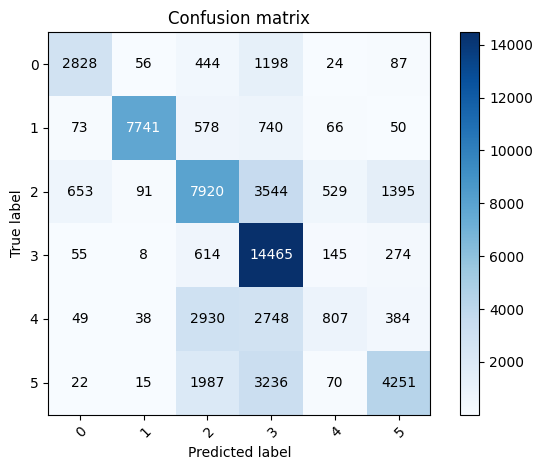

In [28]:
    
    class_names = np.unique(y)
    title = 'Confusion matrix'
    # Compute confusion matrix
    cm = confusion_matrix(y, s_pred)
    # Only use the labels that appear in the data
    classes = class_names
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    normalize=False
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [29]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])